# Evaluation of classification models

Using the files generated in the data collection stage:

1. Process the data so that each observation has at least 30 variables or features. The way you process the data depends on the signals acquired.

In [1]:
import pickle
import numpy as np
from scipy import stats
from scipy.fft import fft


# Load data
file_name = 'luis_data_1.obj'
inputFile = open(file_name, 'rb')
experiment_data = pickle.load(inputFile)

# Process each trial and build data matrices
features = []
for tr in experiment_data:
    
    # For each signal (one signal per axis)
    feat = [tr[1],]
    rms = 0
    for s in range(tr[2].shape[1]):
        sig = tr[2][:,s]

        feat.append(np.average(sig))
        feat.append(np.std(sig))
        feat.append(stats.kurtosis(sig))
        feat.append(stats.skew(sig))
        fft_vals = fft(sig)
        feat.append(np.abs(fft_vals[0])) 
        feat.append(np.mean(np.abs(fft_vals))) 
        feat.append(np.std(np.abs(fft_vals)))  
        feat.append(np.max(sig))
        feat.append(np.min(sig))
        rms += np.sum(sig**2)
    
    rms = np.sqrt(rms)
    feat.append(rms)
    
    features.append(feat)      

# Build x and y arrays
processed_data =  np.array(features)
x = processed_data[:,1:]
y = processed_data[:,0]

# Save processed data
np.savetxt("activity_data.txt", processed_data)

#-----------------------------------------------------------------------------------------------
#   End of file
#-----------------------------------------------------------------------------------------------

2. Evaluate the performance of the classification models: SVM, radial basis SVM, LDA, k-NN, and MLP (with at least 2 layers). Calculate accuracy, precision per class, and recall per class for each of the models.

In [2]:
import time

import requests

import threading 

from scipy.interpolate import interp1d

from sklearn.svm import SVC 
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from warnings import filterwarnings
filterwarnings("ignore")


data = np.loadtxt("activity_data.txt")
x = data[:, 1:]
y = data[:,0]

n_folds = 5
kf = StratifiedKFold(n_splits=n_folds, shuffle = True)

classifiers = [SVC(kernel = 'linear'), SVC(kernel='rbf'),KNeighborsClassifier(n_neighbors=5),MLPClassifier(),LinearDiscriminantAnalysis()]
for classifier in classifiers:
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x, y):
        
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = classifier
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]    
        y_pred = clf_cv.predict(x_test)

        # Concatenate results of evaluation
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)   

    # Model performance
    print(f'The performance oof the model using {classifier} was: \n{classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))}')

/Users/luiscarlosmarrufopadilla/Developer/TEC/Omar/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


The performance oof the model using SVC(kernel='linear') was: 
              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95        60
         2.0       0.98      1.00      0.99        60
         3.0       0.92      0.97      0.94        60
         4.0       0.94      0.97      0.95        60
         5.0       1.00      1.00      1.00        60
         6.0       0.96      0.90      0.93        60

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

The performance oof the model using SVC() was: 
              precision    recall  f1-score   support

         1.0       0.85      0.77      0.81        60
         2.0       0.97      0.98      0.98        60
         3.0       0.95      0.93      0.94        60
         4.0       0.79      1.00      0.88        60
         5.0       0.96      0.82      0.88        60
         6.0       0.

3. Select five classification models that were not used in class and evaluate them on your dataset. Calculate accuracy, precision, and recall for each of these models.

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),GaussianNB()]
for classifier in classifiers:
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x, y):
        
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = classifier
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]    
        y_pred = clf_cv.predict(x_test)

        # Concatenate results of evaluation
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)   

    # Model performance
    print(f'The performance of the model using {classifier}: \n{classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))}')


The performance of the model using RandomForestClassifier(): 
              precision    recall  f1-score   support

         1.0       1.00      0.93      0.97        60
         2.0       0.97      0.98      0.98        60
         3.0       0.95      1.00      0.98        60
         4.0       0.94      1.00      0.97        60
         5.0       1.00      1.00      1.00        60
         6.0       0.98      0.92      0.95        60

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

The performance of the model using AdaBoostClassifier(): 
              precision    recall  f1-score   support

         1.0       0.94      0.52      0.67        60
         2.0       0.47      0.58      0.52        60
         3.0       0.54      0.65      0.59        60
         4.0       0.40      0.87      0.55        60
         5.0       0.94      0.57      0.71        60
         6.0

# Optimization of classification models
Using the files generated in the data collection stage:

**1. Select two of the models tested in the previous step that include hyperparameters, and identify what those hyperparameters are**

The models that we will use for this step is 
- Support Vector Classifier ($\gamma$)
- Linear Support Vector Classifier (Regularization Parameter C)

**2. Select at least one of the hyperparameters for each model and graph the performance that would be obtained with different proposed values ​​of hyperparameters for each model.**

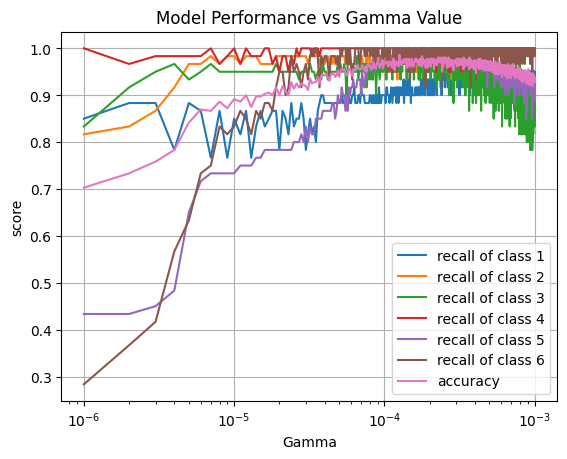

In [4]:
import matplotlib.pyplot as plt

vals = np.linspace(0.000001, 0.001, 1000)

recalls1 = []
recalls2 = []
recalls3 = []
recalls4 = []
recalls5 = []
recalls6 = []

accuracy = []  
    
for gamma in vals:
    cv_y_test = []
    cv_y_pred = []
    for train_index, test_index in kf.split(x, y):
        
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel='rbf', gamma=gamma)
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]    
        y_pred = clf_cv.predict(x_test)

        # Concatenate results of evaluation
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    # Model performance
    recalls = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred),average=None)
    
    recalls1.append(recalls[0])
    recalls2.append(recalls[1])
    recalls3.append(recalls[2])
    recalls4.append(recalls[3])
    recalls5.append(recalls[4])
    recalls6.append(recalls[5])
    
    accuracy.append(accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

plt.plot(vals, recalls1, label = 'recall of class 1')
plt.plot(vals, recalls2, label = 'recall of class 2')
plt.plot(vals,recalls3, label = 'recall of class 3')
plt.plot(vals, recalls4, label = 'recall of class 4')
plt.plot(vals, recalls5, label = 'recall of class 5')
plt.plot(vals, recalls6, label = 'recall of class 6')
plt.plot(vals, accuracy, label = 'accuracy')

plt.xlabel('Gamma')
plt.ylabel('score')
plt.title('Model Performance vs Gamma Value')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show() 

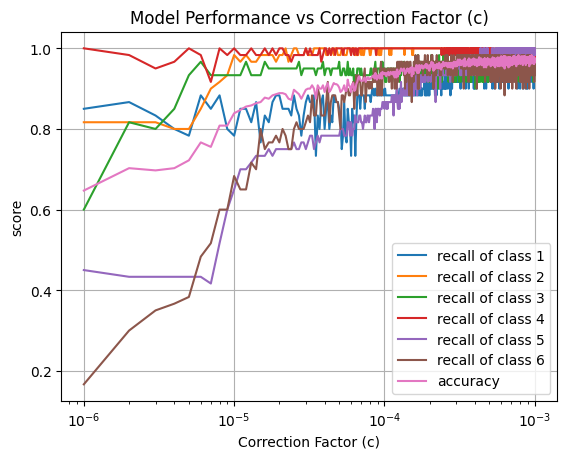

In [5]:

vals = np.linspace(0.000001, 0.001, 1000)

recalls1 = []
recalls2 = []
recalls3 = []
recalls4 = []
recalls5 = []
recalls6 = []

accuracy = []  
      
for c in vals:
    cv_y_test = []
    cv_y_pred = []
    for train_index, test_index in kf.split(x, y):
        
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel='linear', C=c)
        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]    
        y_pred = clf_cv.predict(x_test)

        # Concatenate results of evaluation
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    # Model performance
    recalls = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred),average=None)
    
    recalls1.append(recalls[0])
    recalls2.append(recalls[1])
    recalls3.append(recalls[2])
    recalls4.append(recalls[3])
    recalls5.append(recalls[4])
    recalls6.append(recalls[5])
    
    accuracy.append(accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

plt.plot(vals, recalls1, label = 'recall of class 1')
plt.plot(vals, recalls2, label = 'recall of class 2')
plt.plot(vals,recalls3, label = 'recall of class 3')
plt.plot(vals, recalls4, label = 'recall of class 4')
plt.plot(vals, recalls5, label = 'recall of class 5')
plt.plot(vals, recalls6, label = 'recall of class 6')
plt.plot(vals, accuracy, label = 'accuracy')

plt.xlabel('Correction Factor (c)')
plt.ylabel('score')
plt.title('Model Performance vs Correction Factor (c)')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show() 
 

**3. For the same classification models, apply a feature selection method and indicate which features are selected. Is it possible to reduce the number of features without losing performance in your model?**

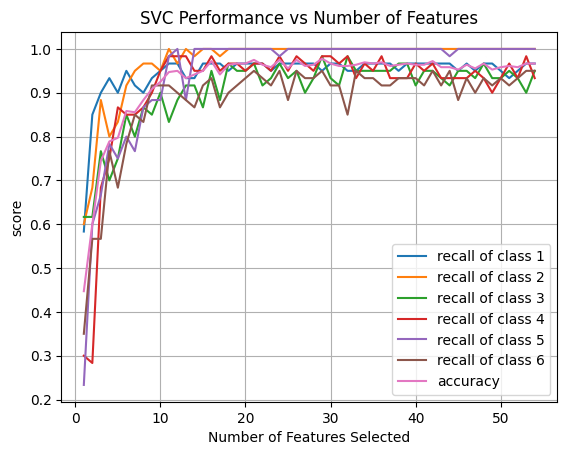

In [6]:
from sklearn.feature_selection import RFE

k = [ i for i in range(1,55)]

recalls1 = []
recalls2 = []
recalls3 = []
recalls4 = []
recalls5 = []
recalls6 = []

accuracy = []  

for n in k:
    
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x,y):
        
        x_train = x[train_index, :]
        y_train = y[train_index]
        
        clf_cv = SVC(kernel='linear')
        
        fselection_cv = RFE(clf_cv, n_features_to_select=n)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
    
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    # Model performance
    recalls = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred),average=None)
    
    recalls1.append(recalls[0])
    recalls2.append(recalls[1])
    recalls3.append(recalls[2])
    recalls4.append(recalls[3])
    recalls5.append(recalls[4])
    recalls6.append(recalls[5])
    
    accuracy.append(accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
    
    
plt.plot(k, recalls1, label = 'recall of class 1')
plt.plot(k, recalls2, label = 'recall of class 2')
plt.plot(k,recalls3, label = 'recall of class 3')
plt.plot(k, recalls4, label = 'recall of class 4')
plt.plot(k, recalls5, label = 'recall of class 5')
plt.plot(k, recalls6, label = 'recall of class 6')
plt.plot(k, accuracy, label = 'accuracy')

plt.xlabel('Number of Features Selected')
plt.ylabel('score')
plt.title('SVC Performance vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()         

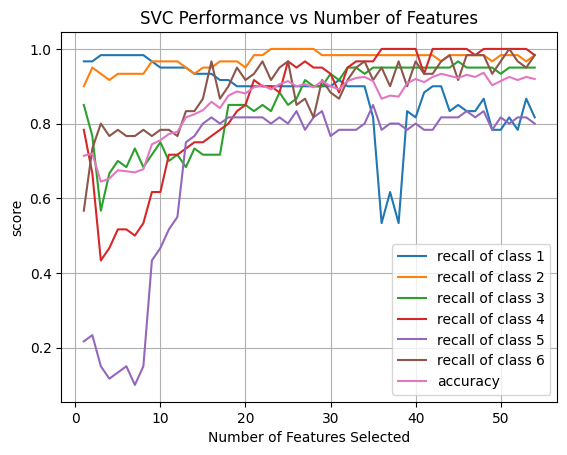

In [7]:
from sklearn.feature_selection import SelectKBest, f_classif

k = [ i for i in range(1,55)]

recalls1 = []
recalls2 = []
recalls3 = []
recalls4 = []
recalls5 = []
recalls6 = []

accuracy = []  

for n in k:
    
    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x,y):
        
        x_train = x[train_index, :]
        y_train = y[train_index]
        
        clf_cv = SVC(kernel='rbf')
        
        fselection_cv = SelectKBest(f_classif, k=n)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
    
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    # Model performance
    recalls = recall_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred),average=None)
    
    recalls1.append(recalls[0])
    recalls2.append(recalls[1])
    recalls3.append(recalls[2])
    recalls4.append(recalls[3])
    recalls5.append(recalls[4])
    recalls6.append(recalls[5])
    
    accuracy.append(accuracy_score(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
    
    
plt.plot(k, recalls1, label = 'recall of class 1')
plt.plot(k, recalls2, label = 'recall of class 2')
plt.plot(k,recalls3, label = 'recall of class 3')
plt.plot(k, recalls4, label = 'recall of class 4')
plt.plot(k, recalls5, label = 'recall of class 5')
plt.plot(k, recalls6, label = 'recall of class 6')
plt.plot(k, accuracy, label = 'accuracy')

plt.xlabel('Number of Features Selected')
plt.ylabel('score')
plt.title('SVC Performance vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()

For both models the bbest number of features was 10 with them seeing little increse when features were included thereafter


**4. Evaluate your classification models including hyperparameters selection and feature selection using nested cross-validation.**

In [8]:
from sklearn.model_selection import GridSearchCV

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    base_estimator = SVC(kernel='linear')
    fselection = RFE(base_estimator, n_features_to_select=10)
    fselection.fit(x_train, y_train)
    x_train = fselection.transform(x_train)
    x_test = fselection.transform(x_test)

    # Step 2: Grid search on reduced training set
    parameters = {'C': np.linspace(0.00001, 0.001, 1000)}
    clf_cv = GridSearchCV(SVC(kernel='linear'), parameters, cv=5)
    clf_cv.fit(x_train, y_train)

    # Step 3: Predict and evaluate
    y_pred = clf_cv.predict(x_test)
    
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
# Model performance
print(f'The performance of the model using SVC with the linear kernel and 10 features is: \n{classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))}')

The performance of the model using SVC with the linear kernel and 10 features is: 
              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95        60
         2.0       0.89      0.92      0.90        60
         3.0       0.83      0.83      0.83        60
         4.0       0.85      1.00      0.92        60
         5.0       0.98      0.87      0.92        60
         6.0       0.84      0.78      0.81        60

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360



In [9]:
from sklearn.model_selection import GridSearchCV

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    
    y_test = y[test_index]
    base_estimator = SVC(kernel='rbf')
    fselection_cv = SelectKBest(f_classif, k=32)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    x_test = fselection_cv.transform(x[test_index, :])
    
    # Step 2: Grid search on reduced training set
    parameters = {'C': np.linspace(0.00001, 0.001, 1000)}
    clf_cv = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5)
    clf_cv.fit(x_train, y_train)

    # Step 3: Predict and evaluate
    y_pred = clf_cv.predict(x_test)
    
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
# Model performance
print(f'The performance of the model using SVC with the rbf kernel and 32 features is: \n{classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))}')

The performance of the model using SVC with the rbf kernel and 32 features is: 
              precision    recall  f1-score   support

         1.0       0.92      0.90      0.91        60
         2.0       0.67      0.97      0.79        60
         3.0       0.66      0.90      0.76        60
         4.0       0.69      0.95      0.80        60
         5.0       1.00      0.63      0.78        60
         6.0       0.75      0.15      0.25        60

    accuracy                           0.75       360
   macro avg       0.78      0.75      0.71       360
weighted avg       0.78      0.75      0.71       360



## Online classification
Implement an application that performs real-time predictions as data is collected (online classification). It is only necessary to implement this with one of the models, and hyperparameter optimization or feature selection is not required.

In [10]:
#------------------------------------------------------------------------------------------------------------------
#   Online classification of mobile sensor data
#------------------------------------------------------------------------------------------------------------------

import time
import requests
import numpy as np
import threading
from scipy.interpolate import interp1d

##########################################
############ Data properties #############
##########################################

sampling_rate = 20      # Sampling rate in Hz of the input data
window_time = 0.5       # Window size in seconds for each trial window
window_samples = int(window_time * sampling_rate)   # Number of samples in each window

##########################################
##### Load data and train model here #####
##########################################

data = np.loadtxt("activity_data.txt")
x = data[:, 1:]
y = data[:,0]

model = SVC(kernel='linear')
model.fit(x,y)
    
# Model performance

##########################################
##### Data acquisition configuration #####
##########################################

# Communication parameters
IP_ADDRESS = '10.43.98.215'
COMMAND = 'accX&accY&accZ&acc_time&gyroX&gyroY&gyroZ'  # Data to be fetched from the mobile device
BASE_URL = "http://{}/get?{}".format(IP_ADDRESS, COMMAND)

# Data buffer (circular buffer)
max_samp_rate = 5000            # Maximum possible sampling rate
n_signals = 6                   # Number of signals (accX, accY, accZ)
buffer_size = max_samp_rate*5   # Buffer size (number of samples to store)

buffer = np.zeros((buffer_size, n_signals + 1), dtype='float64')    # Buffer for storing data
buffer_index = 0                                                    # Index for the next data point to be written
last_sample_time = 0.0                                              # Last sample time for the buffer

# Flag for stopping the data acquisition
stop_recording_flag = threading.Event()

# Mutex for thread-safe access to the buffer
buffer_lock = threading.Lock()

# Function for continuously fetching data from the mobile device
def fetch_data():    
    sleep_time = 1. / max_samp_rate 
    while not stop_recording_flag.is_set():
        try:
            response = requests.get(BASE_URL, timeout=0.5)
            response.raise_for_status()            
            data = response.json()

            global buffer, buffer_index, last_sample_time
            
            with buffer_lock:  # Ensure thread-safe access to the buffer
                buffer[buffer_index:, 0] = data["buffer"]["acc_time"]["buffer"][0]    
                buffer[buffer_index:, 1] = data["buffer"]["accX"]["buffer"][0]
                buffer[buffer_index:, 2] = data["buffer"]["accY"]["buffer"][0]
                buffer[buffer_index:, 3] = data["buffer"]["accZ"]["buffer"][0]
                buffer[buffer_index:, 4] = data["buffer"]["gyroX"]["buffer"][0]
                buffer[buffer_index:, 5] = data["buffer"]["gyroY"]["buffer"][0]
                buffer[buffer_index:, 6] = data["buffer"]["gyroZ"]["buffer"][0]
                

                buffer_index = (buffer_index + 1) % buffer_size
                last_sample_time = data["buffer"]["acc_time"]["buffer"][0] 

        except Exception as e:
            print(f"Error fetching data: {e}")

        time.sleep(sleep_time)

# Function for stopping the data acquisition
def stop_recording():
    stop_recording_flag.set()
    recording_thread.join()
    
# Start data acquisition
recording_thread = threading.Thread(target=fetch_data, daemon=True)
recording_thread.start()

##########################################
######### Online classification ##########
##########################################

update_time = 0.25
ref_time = time.time()

while True:
        
    time.sleep(update_time)   

    if buffer_index > 2*sampling_rate:  # Update every update_time seconds and only if enough data is available
    
        ref_time = time.time()
        
        ##### Get last data samples #####            
        
        # Get data from circular buffer
        end_index = (buffer_index - 1) % buffer_size
        start_index = (buffer_index - 2) % buffer_size
        
        with buffer_lock:

            while (buffer[end_index, 0] - buffer[start_index, 0]) <= window_time:
                start_index = (start_index-1) % buffer_size

            indices = (buffer_index - np.arange(buffer_size, 0, -1)) % buffer_size            
            last_raw_data = buffer[indices, :]  # Get last data samples from the buffer

        # Calculate time vector for interpolation                    
        t = last_raw_data[:, 0]  # Time vector from the buffer
        t_uniform = np.linspace(last_sample_time-window_time, last_sample_time, int(window_time * sampling_rate))   

        # interpolate each signal to a uniform time vector
        last_data = np.zeros((len(t_uniform), n_signals))  # Array with interpolated data
        for i in range(n_signals):
            interp_x = interp1d(t, last_raw_data[:, i+1], kind='linear', fill_value="extrapolate") # Interpolation function for signal i
            last_data[:,i] = interp_x(t_uniform)  # Interpolate signal i to the uniform time vector
                        
        #print ("Window data:\n", last_data)

        #######################################################
        ##### Calculate features of the last data samples #####
        #######################################################
        
        #######################################################
        ##### Calculate features of the last data samples #####
        #######################################################

        from scipy import stats
        from scipy.fft import fft

        feat = []
        rms = 0

        for s in range(last_data.shape[1]):
            sig = last_data[:, s]

            feat.append(np.average(sig))
            feat.append(np.std(sig))
            feat.append(stats.kurtosis(sig))
            feat.append(stats.skew(sig))
            fft_vals = fft(sig)
            feat.append(np.abs(fft_vals[0])) 
            feat.append(np.mean(np.abs(fft_vals))) 
            feat.append(np.std(np.abs(fft_vals)))  
            feat.append(np.max(sig))
            feat.append(np.min(sig))
            rms += np.sum(sig**2)

        rms = np.sqrt(rms)
        feat.append(rms)

        feat = np.array(feat).reshape(1, -1)  # FIXED: reshape for sklearn

        #################################################################
        ##### Evaluate classifier here with the calculated features #####
        #################################################################

        #transformed_feat = fselection_cv.transform(feat)  # FIXED: after reshape
        y_hat = model.predict(feat)[0]       # FIXED: get scalar from array

        acts = {
            1: 'doing nothing',
            2: 'jumping',
            3: 'running',
            4: 'walking',
            5: 'squatting',
            6: 'doing Jumping Jacks'
        }
        print(f'You are now {acts[y_hat]}.')    
# Stop data acquisition
stop_recording()
#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------

You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now squatting.
You are now walking.
You are now walking.
You are now walking.
You are now walking.
You are now doing nothing.
You are now doing nothing.
You are now doing nothing.
You are now doing nothing.
You are now doing nothing.
You are now doing nothing.
You are now doing nothing.
You are now doing nothing.
You are no

KeyboardInterrupt: 

Error fetching data: HTTPConnectionPool(host='10.43.98.215', port=80): Max retries exceeded with url: /get?accX&accY&accZ&acc_time&gyroX&gyroY&gyroZ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x16a26b610>: Failed to establish a new connection: [Errno 61] Connection refused'))
Error fetching data: HTTPConnectionPool(host='10.43.98.215', port=80): Max retries exceeded with url: /get?accX&accY&accZ&acc_time&gyroX&gyroY&gyroZ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x16a287fd0>: Failed to establish a new connection: [Errno 61] Connection refused'))
Error fetching data: HTTPConnectionPool(host='10.43.98.215', port=80): Max retries exceeded with url: /get?accX&accY&accZ&acc_time&gyroX&gyroY&gyroZ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x16a291d90>: Failed to establish a new connection: [Errno 61] Connection refused'))
Error fetching data: HTTPConnectionPool(host='10.43.98.215', port=80):